<a href="https://colab.research.google.com/github/LucaChuang/Classification-of-people-wearing-face-masks-vs-not-wearing-face-masks/blob/main/Project2_Team1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
from keras import optimizers
keras.__version__

'2.4.3'

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Set up path

Image shared files link:

https://drive.google.com/drive/folders/1sbNrKQUyzkI8SXjlYq2OrDHIAoYQY_St?usp=sharing

In [ ]:
path = "/content/drive/Shared drives/Deep Learning Team1/Project2/project image/" 

# set up a train_dir and test_dir for train and test data
train_dir = path + "train"
test_dir = path + "test"

# Data preprocessing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator contain information of train images.
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# test_generator contain informaion of test images.
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 817 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
# check the input shape of data
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
labels_batch

array([0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0.], dtype=float32)

# Baseline Model

In [ ]:
# Since we are doing classification of binary class: wear mask vs no wear mask.
# In our data, we have 50% wearing and 50% no wearing. Assuming that model have 50% chance to predict it right.
print("baseline model accuracy is " + str(1/(1+1)))

baseline model accuracy is 0.5


# Modeling

In [ ]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in 5
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=5, 
                                   restore_best_weights=True)

## Model 1: Basic model

### Model

In [ ]:
from keras import layers
from keras import models

# declare model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) # this needs to match with our data prep - upcoming!
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
# compile the model
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
import time

start = time.time()
print("hello")

history = model.fit_generator(
      train_generator,
      callbacks=[es],
      steps_per_epoch=20, # ideally...len(trainX) // BS == 400/20  == 20
      epochs=50,
      validation_data=test_generator,
      validation_steps=5)  # ideally...len(valX) // BS == 10/20 == 50
                            # Total number of steps (batches of samples) to validate before stopping.

end = time.time()
print(end - start)

hello
Epoch 1/50
 1/20 [>.............................] - ETA: 0s - loss: 0.7038 - accuracy: 0.3500

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 4/20 [=====>........................] - ETA: 14s - loss: 1.3614 - accuracy: 0.4250

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 59s 3s/step - loss: 0.8288 - accuracy: 0.4950 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 50s 2s/step - loss: 0.6931 - accuracy: 0.5825 - val_loss: 0.6846 - val_accuracy: 0.5300
Epoch 3/50
20/20 [==============================] - 33s 2s/step - loss: 0.6921 - accuracy: 0.5025 - val_loss: 0.6818 - val_accuracy: 0.7200
Epoch 4/50
20/20 [==============================] - 29s 1s/step - loss: 0.6913 - accuracy: 0.5189 - val_loss: 0.6527 - val_accuracy: 0.6600
Epoch 5/50
20/20 [==============================] - 28s 1s/step - loss: 0.6914 - accuracy: 0.5743 - val_loss: 0.7409 - val_accuracy: 0.5800
Epoch 6/50
20/20 [==============================] - 27s 1s/step - loss: 0.7291 - accuracy: 0.5450 - val_loss: 0.6581 - val_accuracy: 0.6900
Epoch 7/50
20/20 [==============================] - 28s 1s/step - loss: 0.6601 - accuracy: 0.6800 - val_loss: 0.5724 - val_accuracy: 0.7400
Epoch 8/50
20/20 [=============

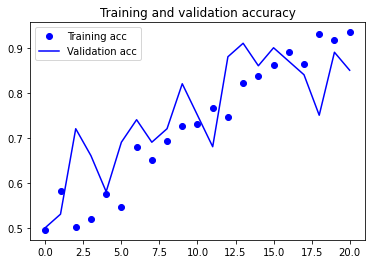

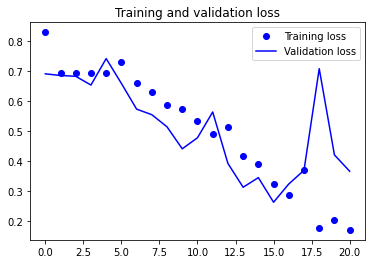

In [ ]:
import matplotlib.pyplot as plt

#plot the learning curve 
#compare accuracy and loss of train and validation data.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model Evaluation

In [ ]:
# we can only call test_generator.classes to make confusion matrix and classification report
# if we don't add shuffle = False, then the test data will shffule.
# however, we only call test_generator.classes from test_generator.
# while the image data are shffule, we still use the previous label. our preds result will not as good as we expect, since the data and label do not match.
# In this case, we need to rewrite test_generator and add the condition shuffle = False.
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle = False,
        class_mode='binary')


Found 200 images belonging to 2 classes.


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
preds = np.round(model.predict(test_generator),0)


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
# confusion matrix and classification report
print(confusion_matrix(test_generator.classes, preds))
print(classification_report(test_generator.classes, preds))

[[92  8]
 [18 82]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       100
           1       0.91      0.82      0.86       100

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



## Model 2: Pre-train model

In [ ]:
# set the data again (since we unshuffle for prediction in last model)
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 817 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # weights from imagenet - very important! otherwise it's just the network structure
                  include_top=False, # this means that our dense layer will be trained specific to our small data problem that we are solving
                  input_shape=(150, 150, 3)) # this is the shape of the data from our data generator (we know cats vs. dogs is 150 x 150)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### Model

In [ ]:
# declare a new model with pre-train model VGG16
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
conv_base.trainable = True

# frozen layers up until 'block4_pool', and the layers 'block5_conv1', 'block5_conv2' and 'block5_conv3' should be trainable.
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
start = time.time()
print("hello")

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      callbacks=[es],
      epochs=50,
      validation_data=test_generator,
      validation_steps=5)

end = time.time()
print(end - start)

hello
Epoch 1/50
15/20 [=====================>........] - ETA: 25s - loss: 0.6258 - accuracy: 0.6498

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


20/20 [==============================] - 131s 7s/step - loss: 0.6168 - accuracy: 0.6549 - val_loss: 0.4566 - val_accuracy: 0.8800
Epoch 2/50
 2/20 [==>...........................] - ETA: 50s - loss: 0.6083 - accuracy: 0.7000

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 137s 7s/step - loss: 0.5448 - accuracy: 0.7525 - val_loss: 0.4029 - val_accuracy: 0.8600
Epoch 3/50
20/20 [==============================] - 135s 7s/step - loss: 0.4372 - accuracy: 0.8575 - val_loss: 0.3343 - val_accuracy: 0.9400
Epoch 4/50
20/20 [==============================] - 130s 7s/step - loss: 0.3674 - accuracy: 0.9043 - val_loss: 0.2574 - val_accuracy: 0.9600
Epoch 5/50
20/20 [==============================] - 134s 7s/step - loss: 0.3229 - accuracy: 0.8900 - val_loss: 0.2474 - val_accuracy: 0.9500
Epoch 6/50
20/20 [==============================] - 130s 6s/step - loss: 0.2610 - accuracy: 0.9270 - val_loss: 0.2485 - val_accuracy: 0.9600
Epoch 7/50
20/20 [==============================] - 135s 7s/step - loss: 0.2076 - accuracy: 0.9450 - val_loss: 0.1950 - val_accuracy: 0.9600
Epoch 8/50
20/20 [==============================] - 134s 7s/step - loss: 0.1931 - accuracy: 0.9496 - val_loss: 0.2211 - val_accuracy: 0.9300
Epoch 9/50
20/20 [======

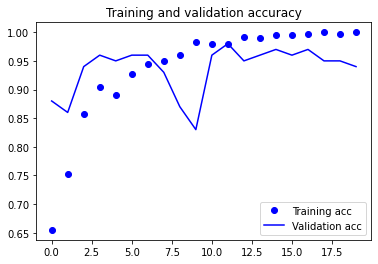

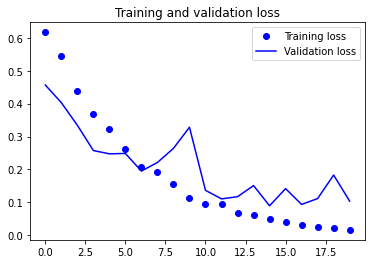

In [ ]:
#plot the learning curve 
#compare accuracy and loss of train and validation data.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model Evaluation

In [ ]:
#rewrite test_generator again.
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle = False,
        class_mode='binary')

Found 200 images belonging to 2 classes.


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
preds = np.round(model.predict(test_generator),0)

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
print(confusion_matrix(test_generator.classes, preds))
print(classification_report(test_generator.classes, preds))

[[98  2]
 [ 7 93]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       100
           1       0.98      0.93      0.95       100

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200

